In [1]:
import cv2
import numpy as np
import os

# === CONFIG ===
img_path = "C:\Bacterial colony counter\Sampledata\sp01_img01.jpg"  # input image

# === Step 1: Load image ===
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError(f"Image not found: {img_path}")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

<>:6: SyntaxWarning: invalid escape sequence '\B'
<>:6: SyntaxWarning: invalid escape sequence '\B'
C:\Users\rohan\AppData\Local\Temp\ipykernel_22436\1885221785.py:6: SyntaxWarning: invalid escape sequence '\B'
  img_path = "C:\Bacterial colony counter\Sampledata\sp01_img01.jpg"  # input image


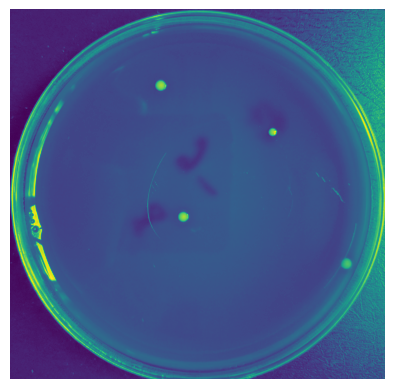

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis('off')
plt.show()

In [ ]:
# Detect circles (plate) using Hough Circle Transform
circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100,
    param1=100, param2=30, minRadius=100, maxRadius=0
)

# Create empty mask
mask = np.zeros_like(gray)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(mask, (x, y), r, 255, -1)  # white circle mask

plt.imshow(mask, cmap='gray')
plt.title("Plate Mask")
plt.axis('off')
plt.show()


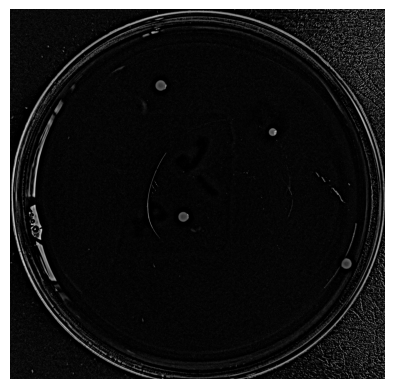

In [ ]:
# Detect circles (plate) using Hough Circle Transform
circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100,
    param1=100, param2=30, minRadius=100, maxRadius=0
)

# Create empty mask
mask = np.zeros_like(gray)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(mask, (x, y), r, 255, -1)  # white circle mask

plt.imshow(mask, cmap='gray')
plt.title("Plate Mask")
plt.axis('off')
plt.show()


In [19]:
# Create scaling mask
mask = contrast_corrected.astype(np.float32) / 255.0

# Apply to each channel
corrected_color = np.zeros_like(img_rgb, dtype=np.float32)
for c in range(3):
    corrected_color[:,:,c] = img_rgb[:,:,c] * mask

# Clip and convert back to uint8
corrected_color = np.clip(corrected_color, 0, 255).astype(np.uint8)


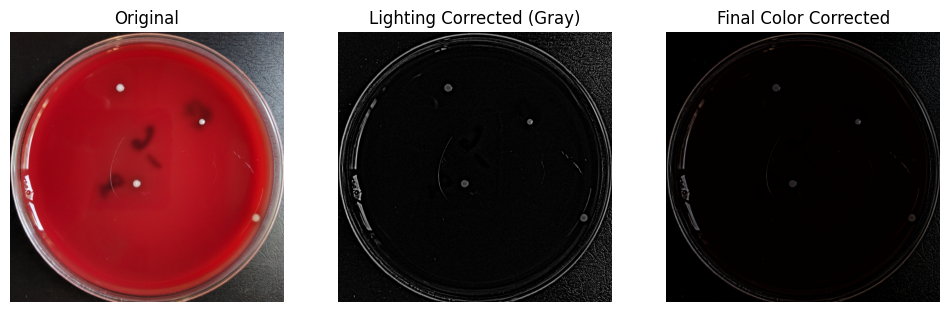

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(contrast_corrected, cmap='gray'); plt.title("Lighting Corrected (Gray)"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(corrected_color); plt.title("Final Color Corrected"); plt.axis('off')
plt.show()
